# Cancellation

In [223]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import chi2,t,norm,bernoulli

π = mt.pi

This is a simple example of how the order of how operations are performed may give some stochastic uncertainty into the data.

In [224]:
dt = np.dtype('float32')  

In [225]:
N = 2000000
μ = 10000
x = np.random.normal(size=N,loc=μ,scale=10000)
x = x.astype(dt)

In [226]:
B=1000
values = np.array([np.random.choice(x, size=len(x), replace=False).mean(dtype=dt) for i in range(B)] )

In [227]:
values-μ

array([3.0292969, 3.0302734, 3.0322266, 3.0263672, 3.03125  , 3.03125  ,
       3.0292969, 3.0302734, 3.0263672, 3.0302734, 3.0292969, 3.03125  ,
       3.0341797, 3.0263672, 3.0292969, 3.03125  , 3.0263672, 3.0351562,
       3.0263672, 3.0322266, 3.0341797, 3.0292969, 3.0302734, 3.0322266,
       3.0322266, 3.0341797, 3.0322266, 3.0332031, 3.0292969, 3.0341797,
       3.03125  , 3.03125  , 3.0302734, 3.0322266, 3.0302734, 3.03125  ,
       3.0283203, 3.0283203, 3.0283203, 3.0322266, 3.03125  , 3.0322266,
       3.0351562, 3.0351562, 3.0322266, 3.0283203, 3.0292969, 3.0322266,
       3.0292969, 3.0283203, 3.0292969, 3.0292969, 3.0302734, 3.0322266,
       3.0332031, 3.0292969, 3.0302734, 3.03125  , 3.0351562, 3.0322266,
       3.03125  , 3.0322266, 3.0332031, 3.0332031, 3.03125  , 3.0322266,
       3.0302734, 3.0273438, 3.0322266, 3.0322266, 3.0341797, 3.0302734,
       3.03125  , 3.0322266, 3.0292969, 3.0302734, 3.03125  , 3.0302734,
       3.0332031, 3.0283203, 3.0302734, 3.0332031, 

<IPython.core.display.Javascript object>


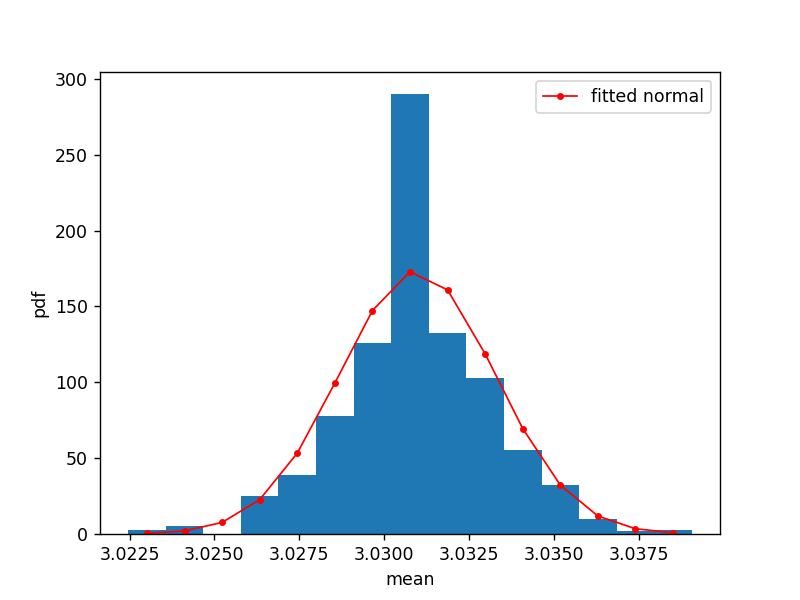

In [228]:
nbins = 15  # number of bins

mm = values-μ
plt.figure()
count, bins, ignored = plt.hist(mm, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,np.mean(mm),np.std(mm)), '.-',linewidth=1, color='r',label='fitted normal')

plt.xlabel('mean');plt.ylabel('pdf')
plt.legend()
plt.show()


In [229]:
# "correct" mean
i=np.argsort(abs(x))
np.mean(x[i])-μ

3.0322265625

In [218]:
np.mean(mm)

13.333082